In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import random
import re
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#df = pd.read_csv('dailydialog.csv')
df = pd.read_excel(r'train_s.xlsx')
dev = pd.read_excel(r'dev_file.xlsx')

In [ ]:
no = ('not' in set(stop_words))
no

True

In [ ]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


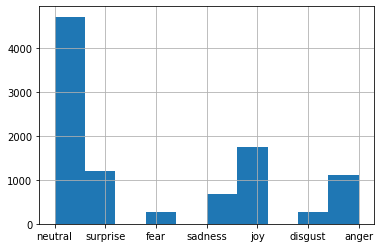

In [ ]:
df.Emotion.hist()
plt.show()

In [ ]:
df.Emotion.value_counts()

neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Emotion, dtype: int64

In [ ]:
def LabelFunc(rating):
    if rating == 'neutral':
        return 0
    elif rating == 'anger':
        return 1
    elif rating == 'disgust':
        return 2
    elif rating == 'fear':
        return 3
    elif rating == 'joy':
        return 4
    elif rating == 'sadness':
        return 5
    elif rating == 'surprise':
        return 6  

df['Label'] = df['Emotion'].apply(LabelFunc)    

In [ ]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Label
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",0
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",0
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",0
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",0
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",6


In [ ]:
df = df[['Utterance','Emotion','Label']]

In [ ]:
df.head()

,Utterance,Emotion,Label
0,also I was the point person on my company’s tr...,neutral,0
1,You must’ve had your hands full.,neutral,0
2,That I did. That I did.,neutral,0
3,So let’s talk a little bit about your duties.,neutral,0
4,My duties? All right.,surprise,6


In [ ]:
df_0 = df[df.Emotion==0]

In [ ]:
df_1 = df[df.Emotion==1]

In [ ]:
df_1.head()

,Emotion,Text
491,1,I'll never ever work together with him !
493,1,Will you take my materials back from him for ...
495,1,"Oh , my God ! I've been cheated !"
497,1,It's a brick ! I can't believe how stupid I w...
499,1,There was a guy on the sidewalk.He had three ...


In [ ]:
df_2 = df[df.Emotion==2]

In [ ]:
df_2.head()

,Emotion,Text
419,2,"Oh , no !"
420,2,How dreadful !
422,2,"Oh , dear . That ’ s terrible . Not at all wh..."
423,2,"It ’ s awful , isn ’ t it ?"
424,2,I can ’ t bear to look at it . I ’ m rather d...


In [ ]:
df_3 = df[df.Emotion==3]
df_4 = df[df.Emotion==4]
df_5 = df[df.Emotion==5]
df_6 = df[df.Emotion==6]

In [ ]:
#df.Label.value_counts()

In [ ]:
df_0_sampled = df_0.sample(5000)
df_4_sampled = df_4.sample(5000)

In [ ]:
# Sampled data
df_new = pd.concat([df_0_sampled, df_1, df_2, df_3, df_4_sampled, df_5, df_6], axis=0)

In [ ]:
df_new = df.copy()
df_new.shape

(9989, 3)

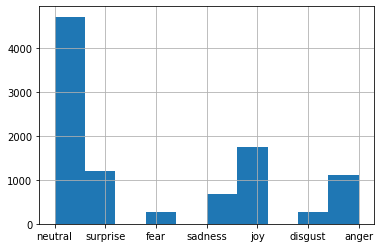

In [ ]:
df_new.Emotion.hist()
plt.show()

In [ ]:
df_new = df_new.sample(frac=1).reset_index(drop=True)

In [ ]:
df_new.head()

,Utterance,Emotion,Label
0,": Oh yeah, of course you don’t!",anger,1
1,Oh gosh!,surprise,6
2,"Just listen, Monica, I, do you know, okay, do ...",neutral,0
3,Enough!,anger,1
4,So what are you saying? It’s now or never?,anger,1


In [ ]:
df_new.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    reformed = ' '.join(reformed)
    return reformed

#df_new['CleanText'] = df_new['Text'].apply(clean_text)
df_new['CleanText'] = df_new['Utterance'].apply(clean_text)

In [ ]:
df_new.head()

,Emotion,Text,CleanText
0,5,"I've made a tough decision , sir . Here's my ...","[made, tough, decision, sir, resignation]"
1,0,What are you going to do to it ?,[going]
2,2,"Oh , don't talk to me about yesterday ! It wa...","[talk, yesterday, awful, evening, ever]"
3,6,Really ? Then what do you do with it ?,[really]
4,0,"No , I really must go now.My family are expec...","[really, must, family, expecting, home, soon]"


In [ ]:
def clean_text(words):
    #words = re.sub(r'http\S+', '', words)
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed]
    #reformed = [word for word in reformed if len(word) > 2]
    #reformed = ' '.join(reformed)
    return reformed

df_new['CleanText_2'] = df_new['Text'].apply(clean_text)

In [ ]:
df_new.head()

,Utterance,Emotion,Label,CleanText
0,": Oh yeah, of course you don’t!",anger,1,yeah course
1,Oh gosh!,surprise,6,gosh
2,"Just listen, Monica, I, do you know, okay, do ...",neutral,0,listen monica know okay know sleep like month ...
3,Enough!,anger,1,enough
4,So what are you saying? It’s now or never?,anger,1,saying never


In [ ]:
all_words = []

for sentence in df_new['CleanText']:
    for word in sentence:
        all_words.append(word)

In [ ]:
len(all_words)

193646

In [ ]:
all_words = nltk.FreqDist(all_words)

In [ ]:
word_features = list(all_words.keys())[:3000]

In [ ]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features    

In [ ]:
df_new.shape

(9989, 4)

In [ ]:
#featuresets = [find_features(sentence) for sentence in X]
training_set = []
for i in range(0,9899):
    training_set.append((find_features(df_new['CleanText'][i]), df_new['Label'][i]))

In [ ]:
dev.shape

(1109, 11)

In [ ]:
dev['Label'] = dev['Emotion'].apply(LabelFunc)

In [ ]:
dev = dev[['Utterance','Emotion','Label']]
dev.head()

,Utterance,Emotion,Label
0,"Oh my God, he’s lost it. He’s totally lost it.",sadness,5
1,What?,surprise,6
2,"Or! Or, we could go to the bank, close our acc...",neutral,0
3,You’re a genius!,joy,4
4,"Aww, man, now we won’t be bank buddies!",sadness,5


In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    reformed = ' '.join(reformed)
    return reformed

dev['CleanText'] = dev['Utterance'].apply(clean_text)

In [ ]:
testing_set = []
for i in range(0,1109):
    testing_set.append((find_features(dev['CleanText'][i]), dev['Label'][i]))

In [ ]:
#training_set = featuresets[:13500]
#testing_set = featuresets[13500:]

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print("Naive Bayes Algo accuracy:", (nltk.classify.accuracy(classifier, testing_set))*100)

Naive Bayes Algo accuracy: 31.379621280432822


In [ ]:
classifier.show_most_informative_features(15)

Most Informative Features
                       q = True                1 : 6      =      2.9 : 1.0
                         = False               6 : 5      =      2.6 : 1.0
                       f = True                1 : 6      =      2.2 : 1.0
                       v = True                2 : 3      =      2.0 : 1.0
                       u = True                2 : 6      =      2.0 : 1.0
                       s = True                5 : 6      =      2.0 : 1.0
                       p = True                2 : 6      =      1.9 : 1.0
                       z = True                2 : 0      =      1.9 : 1.0
                       m = True                5 : 6      =      1.8 : 1.0
                       e = False               6 : 2      =      1.8 : 1.0
                       i = False               6 : 2      =      1.8 : 1.0
                       x = True                2 : 6      =      1.7 : 1.0
                       o = False               6 : 5      =      1.7 : 1.0

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [ ]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("Multinomial NB Algo accuracy:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100) 

Multinomial NB Algo accuracy: 42.38052299368801


In [ ]:
Bernoulli_classifier = SklearnClassifier(BernoulliNB())
Bernoulli_classifier.train(training_set)
print("Bernoulli NB Algo accuracy:", (nltk.classify.accuracy(Bernoulli_classifier, testing_set))*100) 

Bernoulli NB Algo accuracy: 31.28944995491434


In [ ]:
from sklearn.svm import SVC, NuSVC

In [ ]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC Algo accuracy:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100) 

SVC Algo accuracy: 44.2741208295762


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_classifier = SklearnClassifier(RandomForestClassifier(n_estimators = 70, criterion = 'entropy'))
RF_classifier.train(training_set)
print("RF Algo accuracy:", (nltk.classify.accuracy(RF_classifier, testing_set))*100) 

RF Algo accuracy: 42.65103697024346


In [ ]:
df_new.head()

,Emotion,Text,CleanText,CleanText_2
0,5,"I've made a tough decision , sir . Here's my ...","[made, tough, decision, sir, resignation]","[i, made, a, tough, decision, sir, here, my, r..."
1,0,What are you going to do to it ?,[going],"[what, are, you, going, to, do, to, it]"
2,2,"Oh , don't talk to me about yesterday ! It wa...","[talk, yesterday, awful, evening, ever]","[oh, do, talk, to, me, about, yesterday, it, w..."
3,6,Really ? Then what do you do with it ?,[really],"[really, then, what, do, you, do, with, it]"
4,0,"No , I really must go now.My family are expec...","[really, must, family, expecting, home, soon]","[no, i, really, must, go, family, are, expecti..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df_new.iloc[:, 2:3].values
y = df_new.iloc[:,0:1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.07, random_state = 0)

In [ ]:
len(X_train)

13505

In [ ]:
all_sents = []
for i in range(0,14522):
  all_sents.append(df_new['Text'][i])

In [ ]:
text_train = all_sents[:13500]
text_test = all_sents[13500:]

In [ ]:
tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english',)
tfidfvectorizer.fit(text_train)
tfidf_train = tfidfvectorizer.transform(text_train)
tfidf_term_vectors  = tfidfvectorizer.transform(text_test)

In [ ]:
tfidf_train.shape

(13500, 7618)

In [ ]:
tfidf_term_vectors.shape

(1022, 7534)

In [ ]:
tfidf_featuressets = []
for i in range(0,13500):
  tfidf_train[i] = tfidf_train[i].toarray()
  tfidf_featuressets.append((tfidf_train[i], df_new['Emotion'][i]))

In [ ]:
tfidf_train = tfidf_train.toarray()

In [ ]:
training_tfidf = []
i=0
for line in tfidf_train:
  line = list(line)
  training_tfidf.append((line,df_new['Emotion'][i]))
  i=i+1

In [ ]:
tfidf_term_vectors = tfidf_term_vectors.toarray()

AttributeError: ignored

In [ ]:
testing_tfidf = []
i=0
for line in tfidf_term_vectors:
  line = list(line)
  testing_tfidf.append((line,df_new['Emotion'][i+13500]))
  i=i+1

In [ ]:
tfidf_test = []
for i in range(0,1022):
  tfidf_test.append((tfidf_term_vectors[i], df_new['Emotion'][i+13500]))

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_tfidf)
print("Naive Bayes Algo accuracy:", (nltk.classify.accuracy(classifier, testing_tfidf))*100)

AttributeError: ignored